# ODE Simulation

Here we provide example workflows for the ODE simulations, that can be used to generate images created in the report. We first consider the basic system of ODEs, before subsequently introducing time dependance.


## Time Evolution


This can be represented by the non-dimensional system of ODEs:

$$ \frac{da}{dt} = a(t)^{2}b(t) - a(t) + n $$

$$ \frac{db}{dt} = - a(t)^{2}b(t) + m $$

where $m$ and $n$ are both positive.


In [1]:
# Ensure working directory is in the parent directory, not the examples folder

import os
cwd = os.getcwd()  # Get the current working directory

# Change the current working directory if necessary
if cwd.endswith('Examples'):
    os.chdir('..')

print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /home/sabsr3/Documents/Lectures/Mathematical_Modelling/Schnakenberg_Sim


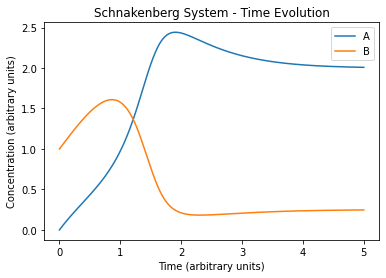

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ode_simulator import solve_schnakenberg

N_STEPS = int(1e3)
STEP_SIZE = 0.005
INITIAL_COND = [0,1]  # Starting value of [A, B]
A_PROD, B_PROD = 1, 1  # Initial production rates

t_steps = np.linspace(0, N_STEPS * STEP_SIZE, N_STEPS)

t_values, state_values = solve_schnakenberg(t_max = N_STEPS * STEP_SIZE,
                                            t_eval = t_steps,
                                            y_init = INITIAL_COND,
                                            rates = [A_PROD, B_PROD])

plt.plot(t_values, state_values[0], label = 'A')
plt.plot(t_values, state_values[1], label = 'B')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Concentration (arbitrary units)')
plt.title('Schnakenberg System - Time Evolution')
plt.legend()
plt.savefig('Images/Schnakenberg_time_evolution.png')
plt.show()

In [3]:
import inspect
print(inspect.getfullargspec(solve_schnakenberg))


FullArgSpec(args=['t_max', 't_min', 'y_init', 'rates', 't_eval'], varargs=None, varkw=None, defaults=(0, [0, 0], [0, 0], None), kwonlyargs=[], kwonlydefaults=None, annotations={})


In [4]:
import plotly.graph_objects as go
from plotly.graph_objects import Layout

# Set layout with background color you want (rgba values)
layout = Layout(plot_bgcolor='rgba(0,0,0,0)')

# Use that layout here
fig = go.Figure(layout=layout)
fig.add_trace(go.Scatter(
    x=t_values, y=state_values[0], name='A'
))
fig.add_trace(go.Scatter(
    x=t_values, y=state_values[1], name='B'
))

fig.update_layout(title='Schnakenberg System - Time Evolution',
                  yaxis_title = 'Concentration (arbitrary units)',
                  xaxis_title ='Time (arbitrary units)',
                  font=dict(family="Arial", size=12, color="Black"))
 

# Change grid color and axis colors
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')#, gridcolor='Black
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')#, gridcolor='Black
fig.show()



We may actually vary the rates of production of A and B to see how this affects the form of the plot above. Unfortunately, plotly does not allow use of multiple sliders like this, so I cannot vary both on one plot, but the 'constant' parameter may be changed at the top of each cell in either case.

In [5]:
# Create figure
fig = go.Figure(layout=layout)

# Set layout with background color you want (rgba values)
layout = Layout(plot_bgcolor='rgba(0,0,0,0)')

NSTEPS_A = 11
a_list = np.linspace(0, 1, NSTEPS_A)
B_PROD = 1  # This rate must be fixed

# Add traces, one for each slider step
for a_value in a_list:
    t_values, state_values = solve_schnakenberg(t_max = N_STEPS * STEP_SIZE,
                                                t_eval = t_steps,
                                                y_init = INITIAL_COND,
                                                rates = [a_value, B_PROD])

    fig.add_trace(
        go.Scatter(
            visible=False,
            x=t_values, y=state_values[0], name = 'A'))
    fig.add_trace(
        go.Scatter(
            visible=False,
            x=t_values, y=state_values[1], name='B'))

# Make first trace visible
fig.data[0].visible = True
fig.data[1].visible = True

# Create and add slider
a_values = []
for i in range(NSTEPS_A):
    a_value = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": f"Rate of Production of A: {a_list[i]:.2f}"}],  # layout attribute
    )
    a_value["args"][0]["visible"][2*i] = True  # Toggle i'th trace to "visible"
    a_value["args"][0]["visible"][2*i+1] = True  # Toggle i'th trace to "visible"
    a_values.append(a_value)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Production of A: "},
    pad={"t": 50},
    steps=a_values
)]

fig.update_layout(title='Rate of Production of A: 0')
fig.update_layout(sliders=sliders)
fig.update_layout(autosize=False, width=800, height=500)  # Maintain aspect ratio

for i, value in enumerate(a_list):  # Rename labels of slider ticks
    fig['layout']['sliders'][0]['steps'][i]['label'] = round(value, 2)

fig.update_xaxes(showline=True, linewidth=1, linecolor='black')#, gridcolor='Black
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')#, gridcolor='Black
fig.show()

In [6]:
# Create figure
fig = go.Figure(layout=layout)

# Set layout with background color you want (rgba values)
layout = Layout(plot_bgcolor='rgba(0,0,0,0)')

NSTEPS_B = 11
b_list = np.linspace(0, 1, NSTEPS_B)
A_PROD = 1  # This rate must be fixed

# Add traces, one for each slider step
for b_value in b_list:
    t_values, state_values = solve_schnakenberg(t_max = N_STEPS * STEP_SIZE,
                                                t_eval = t_steps,
                                                y_init = INITIAL_COND,
                                                rates = [A_PROD, b_value])

    fig.add_trace(
        go.Scatter(
            visible=False,
            x=t_values, y=state_values[0], name = 'A'))
    fig.add_trace(
        go.Scatter(
            visible=False,
            x=t_values, y=state_values[1], name='B'))

# Make first trace visible
fig.data[0].visible = True
fig.data[1].visible = True

# Create and add slider
b_values = []
for i in range(NSTEPS_B):
    b_value = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": f"Rate of Production of A: {b_list[i]:.2f}"}],  # layout attribute
    )
    b_value["args"][0]["visible"][2*i] = True  # Toggle i'th trace to "visible"
    b_value["args"][0]["visible"][2*i+1] = True  # Toggle i'th trace to "visible"
    b_values.append(b_value)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Production of B: "},
    pad={"t": 50},
    steps=b_values
)]

fig.update_layout(title='Rate of Production of B: 0')
fig.update_layout(sliders=sliders)
fig.update_layout(autosize=False, width=800, height=500)  # Maintain aspect ratio

for i, value in enumerate(a_list):  # Rename labels of slider ticks
    fig['layout']['sliders'][0]['steps'][i]['label'] = round(value, 2)

fig.update_xaxes(showline=True, linewidth=1, linecolor='black')#, gridcolor='Black
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')#, gridcolor='Black
fig.show()